# **Forest Cover Type Classification** 
#### Internship Task 1 – Elevvo Pathways
**Author:** Eisha Nadeem  
**Date:** 8 August 2025


### 1. Introduction

This project focuses on predicting forest cover types using cartographic variables from the U.S. Forest Service data. The goal is to apply supervised learning techniques to classify the forest cover into one of seven types.
We explore and compare two powerful ensemble models:

- Random Forest Classifier
- XGBoost Classifier

and then evaluate their performance using accuracy score and confusion matrices.

### 2. Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

### 2. Importing the dataset

In [4]:
df = pd.read_csv('covtype.csv' , header=0)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

### 3. Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

- The dataset doesnt have any null values.
- The dataset has no categorical values.
- It has 55 features and 581012 observations.
- The target is the last column "Cover_Type".

In [7]:
# Now we will check if any column has constant values
# This is important because if a column has constant values, it does not contribute to the model's predictive power.
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print(constant_columns)

[]


In [8]:
df["Cover_Type"].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [9]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
# Separate features and target
X = df.drop(['Cover_Type'], axis=1)
y = df['Cover_Type']

In [ ]:
continuous_cols = [col for col in X.columns if X[col].nunique() > 10 and X[col].dtype in ['int64', 'float64']]
binary_cols = [col for col in X.columns if X[col].nunique() == 2]
categorical_cols = [col for col in X.columns if 2 < X[col].nunique() <= 10]

print("Continuous Columns:\n", continuous_cols)
print("Binary Columns:\n", binary_cols)
print("Categorical Columns:\n", categorical_cols)

Continuous Columns:
 ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
Binary Columns:
 ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
Categorical Columns:
 []


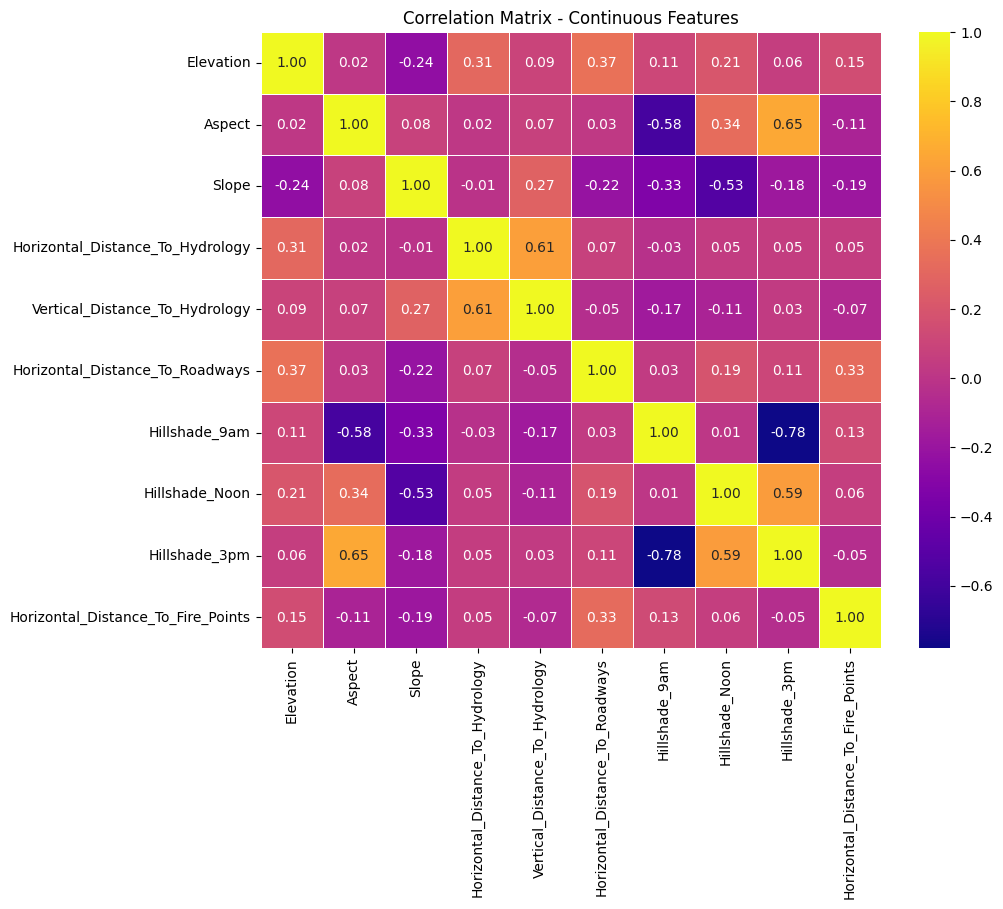

In [12]:
corr = df[continuous_cols].corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Continuous Features")
plt.show()

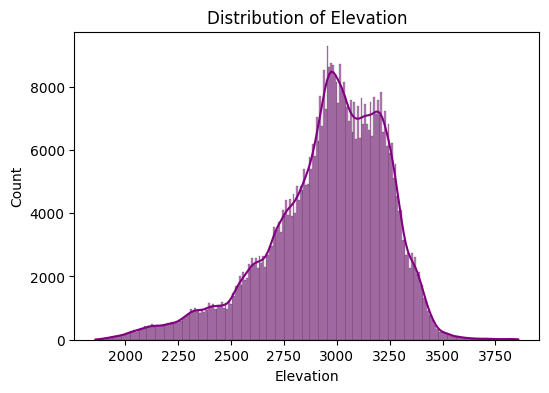

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Elevation"], kde=True, color='Purple')
plt.title(f"Distribution of Elevation")
plt.show()

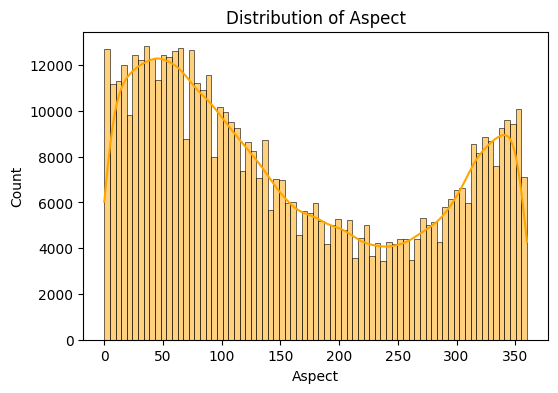

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Aspect"], kde=True, color='Orange')
plt.title(f"Distribution of Aspect")
plt.show()

C:\Users\voice\AppData\Local\Temp\ipykernel_9068\2048838408.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=df, palette='plasma')


<Axes: xlabel='Cover_Type', ylabel='count'>

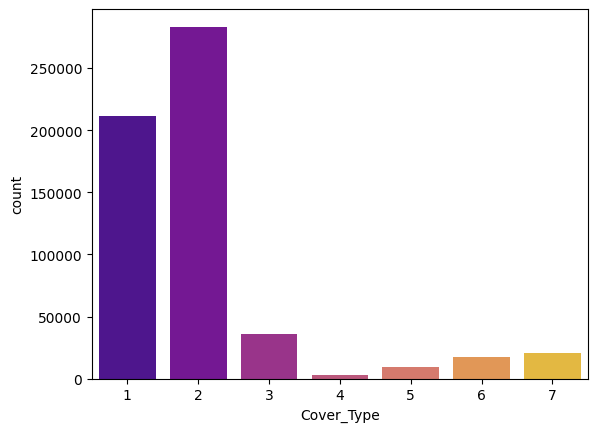

In [15]:
sns.countplot(x='Cover_Type', data=df, palette='plasma')

In [16]:
y = df['Cover_Type'] - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Model Training

#### 1. Random Forest Classifier

In [17]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=10,  # Only 10 combinations randomly sampled
                                   cv=3,
                                   scoring='accuracy',
                                   verbose=2,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [22]:
print("Best Parameters for Random Forest:", random_search.best_params_)

Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


#### 2. XGBoost Classifier

In [21]:
# Define the parameter distribution
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Base model
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=7,  # 7 classes
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Randomized search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=10,  # number of random combinations to try
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search_xgb.fit(X_train, y_train)
# Best model
best_xgb = random_search_xgb.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


d:\Eisha\tts-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:33:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 5. Model Evaluation

In [23]:
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)

Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


#### - Evaluating Random Forest

Random Forest Accuracy: 0.9559477810383553


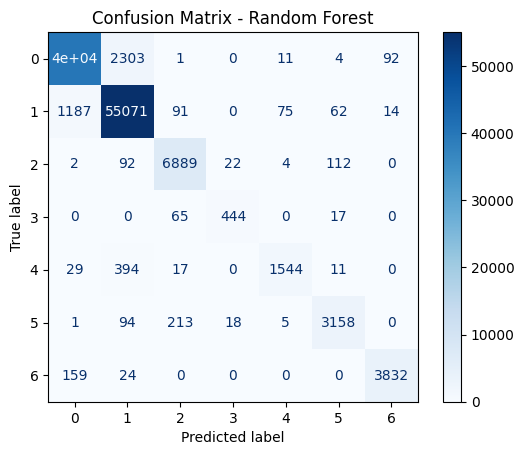

In [ ]:
# Use the best tuned RF model
best_rf = random_search.best_estimator_

# Predict
rf_preds = best_rf.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)

# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

#### - Evaluating XGBoost

XGBoost Accuracy: 0.9434093784153593


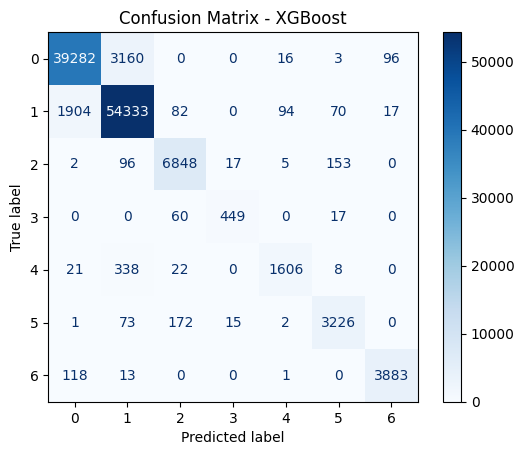

In [ ]:
# Use the best tuned XGBoost model
best_xgb = random_search_xgb.best_estimator_

# Predict
xgb_preds = best_xgb.predict(X_test)

# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("XGBoost Accuracy:", xgb_accuracy)

# Confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_preds)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()

### 6. Conclusion

After training and tuning both the Random Forest and XGBoost models on the Forest Cover Type dataset:

- Random Forest achieved an accuracy of 95.59%
- XGBoost achieved an accuracy of 94.34%

While both models performed well, the Random Forest Classifier slightly outperformed the XGBoost Classifier in terms of accuracy. This suggests that for this particular dataset, which likely benefits from ensemble-based decision trees without heavy gradient boosting, Random Forest offers a better balance of performance and training time.